# Problem 3b

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [2]:
%matplotlib inline

In [3]:
def loss(x, t):
    if t == 1:
        return x
    elif t % 2 == 0:
        return -2 * x
    else:
        return 2 * x
    
def prob(g_t, eta, t):
    idx = t if t < len(eta) else len(eta) - 1
    exp1 = np.exp(-eta[idx] * g_t[0])
    exp2 = np.exp(-eta[idx] * g_t[1])
    den = exp1 + exp2
    return float(exp1 / den), float(exp2 / den), eta[idx]

In [4]:
g_t = [0, 0]
T = 10**6
k = np.arange(1, 10**4 + 1, 200)
eta = 1 / k
x = [0, 1]
total_loss = 0

loss_values = [0]
eta_values = [eta[0]]
for t in range(1, T+1):
    p1, p2, eta_val = prob(g_t, eta, t)
    x_ = int(np.random.choice(x, 1, p=[p1, p2]))
    g_t[0] += loss(0, t)
    g_t[1] += loss(1, t)
    total_loss += loss(x_, t)
    loss_values.append(total_loss)
    eta_values.append(eta_val)

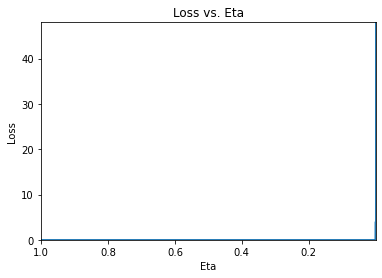

In [5]:
plt.title("Loss vs. Eta")
plt.ylabel("Loss")
plt.xlabel("Eta")
plt.axis([max(eta_values),min(eta_values), 0, max(loss_values)])
plt.plot(eta_values, loss_values)
plt.savefig("etaVloss.PDF")
plt.show()

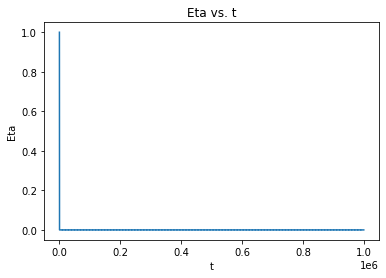

In [6]:
plt.title("Eta vs. t")
plt.ylabel("Eta")
plt.xlabel("t")
plt.plot(np.arange(1, 10**6 + 2), eta_values)
plt.savefig("etaVt.PDF")
plt.show()

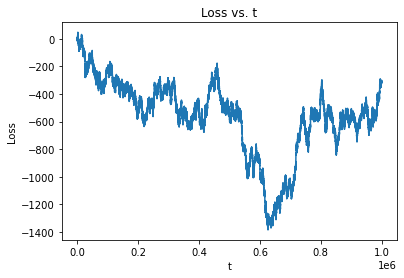

In [7]:
plt.title("Loss vs. t")
plt.ylabel("Loss")
plt.xlabel("t")
plt.plot(np.arange(1, 10**6 + 2), loss_values)
plt.savefig("lossVt.PDF")
plt.show()